In [1]:
# Imports
from __future__ import print_function
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from IPython.display import clear_output
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Shape of training data", x_train.shape)
print("Shape of labels", y_train.shape)

Shape of training data (60000, 28, 28)
Shape of labels (60000,)


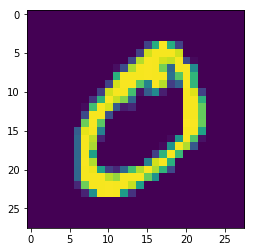

In [4]:
# Visualize Data
plt.imshow(x_train[1])
plt.show()

In [5]:
# Model Parameters
batch_size = 128
num_classes = 10
epochs = 25

# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
# Convert images into proper format that keras reads
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
# Data Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# Plot Loss in real time -- Ref [stared]

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [10]:
# Baseline Model Definition
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total para

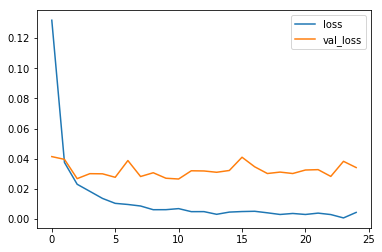

60000/60000 [==============================] - 5s - loss: 0.0043 - acc: 0.9988 - val_loss: 0.0341 - val_acc: 0.9927


In [12]:
# Train Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses])

In [13]:
# Varying the FC layer to reduce num of parameters
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

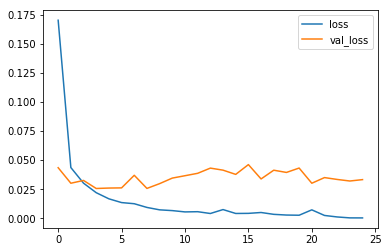

60000/60000 [==============================] - 4s - loss: 2.8163e-04 - acc: 1.0000 - val_loss: 0.0332 - val_acc: 0.9938


In [15]:
# Train Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses])

In [16]:
### Model still achieves 99.38 accuracy, with 14% the numbers of trainable parameters

In [17]:
# What can we do with just 1 Conv Layer
model = Sequential()
model.add(Conv2D(2, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 2)         52        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 98)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               12672     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 14,014
Trainable params: 14,014
Non-trainable params: 0
_________________________________________________________________


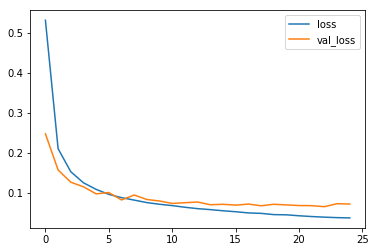

60000/60000 [==============================] - 1s - loss: 0.0377 - acc: 0.9876 - val_loss: 0.0724 - val_acc: 0.9786


In [19]:
# Train Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses])

In [20]:
### Model still achieves 97.86 accuracy, with 0.4% the numbers of trainable parameters

In [21]:
# 1x1 conv layer
model = Sequential()
model.add(Conv2D(2, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(2, (1, 1), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 2)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 2)         6         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 2)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4672      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total para

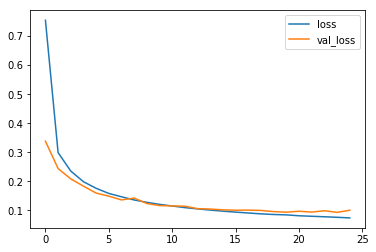

60000/60000 [==============================] - 2s - loss: 0.0740 - acc: 0.9760 - val_loss: 0.1004 - val_acc: 0.9675


In [23]:
# Train Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses])

In [24]:
### Model still achieves 96.75% accuracy, with 0.15% the numbers of trainable parameters